# Table of Contents
 <p><div class="lev1 toc-item"><a href="#MIDS---w261-Machine-Learning-At-Scale" data-toc-modified-id="MIDS---w261-Machine-Learning-At-Scale-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MIDS - w261 Machine Learning At Scale</a></div><div class="lev2 toc-item"><a href="#Assignment---HW4" data-toc-modified-id="Assignment---HW4-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Assignment - HW4</a></div><div class="lev3 toc-item"><a href="#INSTRUCTIONS-for-SUBMISSION" data-toc-modified-id="INSTRUCTIONS-for-SUBMISSION-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>INSTRUCTIONS for SUBMISSION</a></div><div class="lev3 toc-item"><a href="#CONFIGURATION" data-toc-modified-id="CONFIGURATION-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>CONFIGURATION</a></div><div class="lev3 toc-item"><a href="#DATASETS" data-toc-modified-id="DATASETS-113"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>DATASETS</a></div><div class="lev1 toc-item"><a href="#HW-Problems" data-toc-modified-id="HW-Problems-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>HW Problems</a></div><div class="lev2 toc-item"><a href="#HW4.0" data-toc-modified-id="HW4.0-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>HW4.0</a></div><div class="lev2 toc-item"><a href="#HW4.1" data-toc-modified-id="HW4.1-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>HW4.1</a></div><div class="lev2 toc-item"><a href="#HW4.2----Preprocess-log-file-data" data-toc-modified-id="HW4.2----Preprocess-log-file-data-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>HW4.2  - Preprocess log file data</a></div><div class="lev2 toc-item"><a href="#HW4.3---Find-the-most-frequent-pages" data-toc-modified-id="HW4.3---Find-the-most-frequent-pages-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>HW4.3 - Find the most frequent pages</a></div><div class="lev2 toc-item"><a href="#HW4.4----Find-the-most-frequent-visitor" data-toc-modified-id="HW4.4----Find-the-most-frequent-visitor-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>HW4.4  - Find the most frequent visitor</a></div><div class="lev2 toc-item"><a href="#HW4.5---Clustering-Tweet-Dataset" data-toc-modified-id="HW4.5---Clustering-Tweet-Dataset-26"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>HW4.5 - Clustering Tweet Dataset</a></div><div class="lev2 toc-item"><a href="#K-Means" data-toc-modified-id="K-Means-27"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>K-Means</a></div><div class="lev2 toc-item"><a href="#K-means-algorithm" data-toc-modified-id="K-means-algorithm-28"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>K-means algorithm</a></div><div class="lev2 toc-item"><a href="#Calculating-purity" data-toc-modified-id="Calculating-purity-29"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Calculating purity</a></div><div class="lev2 toc-item"><a href="#HW4.6----(OPTIONAL)-Scaleable-K-MEANS++" data-toc-modified-id="HW4.6----(OPTIONAL)-Scaleable-K-MEANS++-210"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>HW4.6  - (OPTIONAL) Scaleable K-MEANS++</a></div><div class="lev3 toc-item"><a href="#4.6.1-(OPTIONAL)-Apply-K-MEANS||" data-toc-modified-id="4.6.1-(OPTIONAL)-Apply-K-MEANS||-2101"><span class="toc-item-num">2.10.1&nbsp;&nbsp;</span>4.6.1 (OPTIONAL) Apply K-MEANS||</a></div><div class="lev2 toc-item"><a href="#HW4.7---(OPTIONAL)-Canopy-Clustering" data-toc-modified-id="HW4.7---(OPTIONAL)-Canopy-Clustering-211"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>HW4.7 - (OPTIONAL) Canopy Clustering</a></div><div class="lev3 toc-item"><a href="#4.7.1-(OPTIONAL)-Apply-Canopy-Clustering-based-K-MEANS" data-toc-modified-id="4.7.1-(OPTIONAL)-Apply-Canopy-Clustering-based-K-MEANS-2111"><span class="toc-item-num">2.11.1&nbsp;&nbsp;</span>4.7.1 (OPTIONAL) Apply Canopy Clustering based K-MEANS</a></div>

# MIDS - w261 Machine Learning At Scale 
__Course Lead:__ Dr James G. Shanahan (__email__ Jimi via  James.Shanahan _AT_ gmail.com)

## Assignment - HW4



---
__Name:__  Victoria Baker
__Class:__ MIDS w261 (Section 2)     
__Email:__  victoria.baker@iSchool.Berkeley.edu     
__StudentId__  3032501083    __End of StudentId__     

__NOTE:__ please replace `1234567` with your student id above      

### INSTRUCTIONS for SUBMISSION

This homework can be completed locally on your computer. __Please submit your notebook to your classroom github repository 24 hours prior to the next live session.__ 

### CONFIGURATION
Before starting your homework run the following cells to confirm your setup.

In [11]:
# general imports
import os
import re
import sys
import numpy as np
import matplotlib.pyplot as plt

# tell matplotlib not to open a new window
%matplotlib inline

# automatically reload modules 
%reload_ext autoreload
%autoreload 2

In [103]:
!pip install mrjob

  Could not find a version that satisfies the requirement mrjobstep (from versions: )
No matching distribution found for mrjobstep


In [12]:
# print some configuration details for future replicability.
print 'Python Version: %s' % (sys.version.split('|')[0])
hdfs_conf = !hdfs getconf -confKey fs.defaultFS ### UNCOMMENT ON DOCKER
#hdfs_conf = !hdfs getconf -confKey fs.default.name ### UNCOMMENT ON ALTISCALE
print 'HDFS filesystem running at: \n\t %s' % (hdfs_conf[0])

Python Version: 2.7.13 
HDFS filesystem running at: 
	 hdfs://quickstart.cloudera:8020


In [ ]:
# create an HDFS directory for this assignment
!hdfs dfs -mkdir hw4

__[OPTIONAL]:__ Save yourself some typing by defining global variables for paths we'll reuse frequently.

In [ ]:
HDFS_DIR = "" # eg. /user/root/hw4 
HOME_DIR = os.getcwd() 

__[OPTIONAL]:__ Fix chrome formatting. _The cell below implements a quick hack based on [this stackoverflow thread](http://stackoverflow.com/questions/34277967/chrome-rendering-mathjax-equations-with-a-trailing-vertical-line) to fix [this known issue](https://github.com/mathjax/MathJax/issues/1300) with Mathjax formatting in Chrome (a rounding issue adds a border to the right of mathjax markup)._

In [3]:
%%javascript
$('.math>span').css("border-left-color","transparent")

<IPython.core.display.Javascript object>

### DATASETS
For this homework we be using two different datasets:
* __Microsoft log files data__ (available from the [UC Irvine KDD Archive](https://kdd.ics.uci.edu/databases/msweb/msweb.html) at [this url](http://archive.ics.uci.edu/ml/machine-learning-databases/anonymous/) - _This data, referenced in the asynch lectures, captures which areas (Vroots) of www.microsoft.com each user visited in a one-week timeframe in Feburary 1998. We'll perform preprocessing on the data in HW 4.2 and find the most frequently visited pages and visitors in HW 4.3 and 4.4_
* __Tweets data__ (from [this publication](https://arxiv.org/abs/1505.04342) in the Journal of Computation Science and available at [this url] - _This data, comes from a corpus of Tweets that were hand coded to reflect whether the tweet was written by a human,cyborg,robot or spammer. The data are in two files: the primary [topUsers file](https://www.dropbox.com/s/6129k2urvbvobkr/topUsers_Apr-Jul_2014_1000-words.txt?dl=0), and an auxilary [word summaries](https://www.dropbox.com/s/w4oklbsoqefou3b/topUsers_Apr-Jul_2014_1000-words_summaries.txt?dl=0) file (more details below). We'll perform a KMeans clustering analysis on this data in HW 4.5._

Follow the directions below to load each of these datasets. You may want to familiarize yourself with their contents before proceeding to the homework questions.

__`anonymous-msweb.data`__  
Notes on the data format:
> The data is in an ASCII-based sparse-data format called "DST". Each line of the data file starts with a letter which tells the line's type. The three line types of interest are:

>__Attribute lines__:
e.g. `A,1277,1,"NetShow for PowerPoint","/stream"`
Where:
  'A' marks this as an attribute line, 
  '1277' is the attribute ID number for an area of the website (called a Vroot),
  '1' may be ignored, 
  '"NetShow for PowerPoint"' is the title of the Vroot, 
  '"/stream"' is the URL relative to "http://www.microsoft.com"

>__Case and Vote Lines__:
For each user, there is a case line followed by zero or more vote lines.
For example:
  C,"10164",10164
  V,1123,1
  V,1009,1
  V,1052,1
Where:
  'C' marks this as a case line, 
  '10164' is the case ID number of a user, 
  'V' marks the vote lines for this case, 
  '1123', 1009', 1052' are the attributes ID's of Vroots that a user visited. 
  '1' may be ignored.
  
Run the cells below to download and examine the file.

In [3]:
# download the data
!curl -L http://archive.ics.uci.edu/ml/machine-learning-databases/anonymous/anonymous-msweb.data -o anonymous-msweb.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1389k  100 1389k    0     0   152k      0  0:00:09  0:00:09 --:--:--  239k


In [4]:
# take a look
!head -n 10 anonymous-msweb.data

I,4,"www.microsoft.com","created by getlog.pl"
T,1,"VRoot",0,0,"VRoot"
N,0,"0"
N,1,"1"
T,2,"Hide1",0,0,"Hide"
N,0,"0"
N,1,"1"
A,1287,1,"International AutoRoute","/autoroute"
A,1288,1,"library","/library"
A,1289,1,"Master Chef Product Information","/masterchef"


__`topUsers_Apr-Jul_2014_1000-words.txt`__  
Notes about the data coding:  
> This file consists of word frequency distributions for 1,000 twitter users. These Twitter users use language in very different ways,and were classified by hand according to the criteria:  

>__0__: Human, _where only basic human-human communication is observed._  

>__1__: Cyborg, _where language is primarily borrowed from other sources. (e.g., jobs listings, classifieds postings, advertisements, etc...)._  

> __2__: Robot, _where language is formulaically derived from unrelated sources(e.g., weather/seismology, police/fire event logs, etc...)._  

>__3__: Spammer, _where language is replicated to high multiplicity
(e.g., celebrity obsessions, personal promotion, etc...)_

Data format:
> `USERID,CODE,TOTAL,WORD1_COUNT,WORD2_COUNT,...`  
where   
USERID = unique user identifier  
CODE = 0/1/2/3 class code  
TOTAL = sum of the word counts  

Run the cells below to load and preview the data. 

In [5]:
# download the main Twitter data
!curl -L -O https://www.dropbox.com/s/6129k2urvbvobkr/topUsers_Apr-Jul_2014_1000-words.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2493k  100 2493k    0     0   108k      0  0:00:22  0:00:22 --:--:--  196k


In [6]:
# take a look at the first row
!head -n 1 topUsers_Apr-Jul_2014_1000-words.txt

1180025371,2,1724608,75552,827,57603,7128,4282,45674,66811,27632,0,8,23783,2,42853,0,62335,22349,21428,19801,4125,0,0,2,1585,21118,1,1,1,16079,19676,1587,0,19695,0,0,0,0,0,0,2,20216,60,4278,0,16,46,788,2,0,0,3,0,3,0,0,111122,0,12,0,0,0,2,739,0,176,0,0,0,38,626,0,0,0,6,1584,0,19672,510,0,0,0,12,0,1675,0,0,0,0,5,2,0,0,1,9,0,0,31,0,0,2,0,0,0,0,4,64,476,0,1,0,617,0,0,15672,70315,70317,0,2997,0,0,0,665,0,0,12,0,0,0,3135,1,2,39,0,0,0,0,23,0,1,0,179,667,0,0,32,0,0,224,5,0,0,66,0,3,450,96,0,0,0,0,8,15,15,0,115,0,0,19672,0,46,15,0,0,2,0,51,0,0,0,298,0,0,5,2,165,3,0,0,46497,0,19675,0,4,0,42036,0,0,40035,84,0,103,0,2,12,1924,7,0,0,0,0,3,0,42629,197,15490,0,0,45,0,0,0,0,0,0,301,0,0,0,0,134,3300,0,422,386,0,19826,2,0,0,46,9,354,175,71,165,20338,0,109,0,1,44376,0,1370,0,0,0,0,0,0,0,0,0,0,2,0,0,4462,0,0,5,0,202,436,408,0,61,0,0,39888,74,0,19672,0,0,0,0,0,19672,19672,2,2,349,0,13,0,30,0,0,8,0,40,0,23,0,12,337,0,12,19952,26,0,0,15489,0,0,0,0,39,0,0,26,0,0,19,144,161,0,0,0,5558,0,23,1561,52,0,0,0,9,0,0,

__`topUsers_Apr-Jul_2014_1000-words_summaries.txt`__
This file contains 5 special word-frequency distributions.
Notes about the format of this auxillary information:  
> Row 1: Words  
Row 2: 1000-user-wide aggregated distribution across all classes  
Row 3-6 class-aggregated distributions for clases 0-3  

In [7]:
# download auxillary file
!curl -L -O https://www.dropbox.com/s/w4oklbsoqefou3b/topUsers_Apr-Jul_2014_1000-words_summaries.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 31952  100 31952    0     0   8130      0  0:00:03  0:00:03 --:--:-- 45450


In [8]:
# take a look at the first few columns
!cut -d ',' -f 1-8 topUsers_Apr-Jul_2014_1000-words_summaries.txt

"ID","CODE","TOTAL_WORDS","http","I","the","to","you"
ALL_CODES,NA,61819567,2488393,1989622,1329663,1259298,1181631
CODE,0,35130977,449927,1668694,914155,957278,916553
CODE,1,11423284,1239122,28497,117272,104367,10209
CODE,2,9373246,613561,42672,191091,60120,31309
CODE,3,5892060,185783,249759,107145,137533,223560


# HW Problems


## HW4.0 

What is MrJob? How is it different to Hadoop MapReduce? 
What are the mapper_init, mapper_final(), combiner_final(), reducer_final() methods? When are they called?

#### Answers

Mrjob is a Python MapReduce package that helps you write and run Hadoop Streaming jobs. MRJob uses Hadoop MapReduce, but it's specifically a Python implementation that allows Hadoop jobs to be run on EMR clusters. The function descriptions are as follows:

mapper_init - This defines an action to run before the mapper processes any input. For example, you could use this function to initialize mapper-specific helpers. It's called before the mapper starts processing data.

mapper_final - This defines an action to run after the mapper reaches the end of input. This is called after reading all input data. 

combiner_final - This defines an action to run after the combiner reaches the end of input. It's called after the combiner has processed all data.

reducer_final - This defines an action to run after the reducer reaches the end of input. It's called at the end of the reducer process.

## HW4.1
- What is serialization in the context of MrJob or Hadoop? 

MRJob assumes that all data is newline-delimited bytes. It automatically serializes and deserializes these bytes using built in protocols. In Hadoop you have to define how you serialize or deserialize data.

- When it used in these frameworks? 

MRJob automatically serializes and deserializes data going into and coming out of each task. The input/output/internal protocol will serialize/deserialize the data according to how you define it. 

- What is the default serialization mode for input and outputs for MrJob? 

The default input protocal is RawValueProtocol. The default output and internal protocols are both JSONProtocol.

## HW4.2  - Preprocess log file data

For this homework question we'll work with the Microsoft log files we downloaded to `anonymous-msweb.data`. Your job is to  transform/preprocess the data on a single node (i.e., not on a cluster of nodes) from the following format:

>C,"10001",10001   #Visitor id 10001  
V,1000,1          #Visit by Visitor 10001 to page id 1000  
V,1001,1          #Visit by Visitor 10001 to page id 1001  
V,1002,1          #Visit by Visitor 10001 to page id 1002  
C,"10002",10002   #Visitor id 10001  
V  
Note: #denotes comments  


to the following format (V, PageID, 1, C, Visitor):

>V,1000,1,C, 10001  
V,1001,1,C, 10001  
V,1002,1,C, 10001  

Write the python code to accomplish this transformation. Save your output to a file called `anonymous-msweb-preprocessed.data`

In [91]:
%%writefile transformation.py
import re
import sys
from collections import defaultdict

pathToFile = sys.argv[1]
wordCounts = defaultdict(int)

def hw42(pathToFile):
    # takes the path to the file as command line argument
    # prints sorted tab separated list of words and counts
    # ex) print word,'\t',count
    # returns sorted list of tuples of words and counts: wordList
    # ex) wordList = [('a', 690),('abide', 2),...]
  
    wordList = {}

    # START STUDENT CODE HW1.1
    with open(pathToFile, 'r') as text_file:
        lines = text_file.readlines()
        for line in lines:
            cols = line.split(",")
            if(cols[0] == "A"):
                attributeId = cols[1]
                #col[2] can be ignored
                VrootTitle = cols[3]
                url = cols[4]
                
            if(cols[0] == "C"):
                caseId = cols[1]
                userNo = cols[2]
            if(cols[0] == "V"):
                string = "V,"+str(cols[1])+",1,C,"+str(userNo)
                string = string.strip('\n')
                print(string)
    
    
    #line = text_file.read().lower()
    
    #for word in re.findall(r'[a-z]+', text_string):
        #wordCounts[word] += 1
        
    #for key in sorted(wordCounts):
        #print key,'\t', wordCounts[key]

    # END STUDENT CODE HW1.1
  
    return

hw42(pathToFile)

#END STUDENT CODE42

Overwriting transformation.py


In [92]:
!python transformation.py 'anonymous-msweb.data' > anonymous-msweb-preprocessed.data

In [93]:
# Take a look at your results
!head -10 anonymous-msweb-preprocessed.data
!wc -l anonymous-msweb-preprocessed.data

V,1000,1,C,10001
V,1001,1,C,10001
V,1002,1,C,10001
V,1001,1,C,10002
V,1003,1,C,10002
V,1001,1,C,10003
V,1003,1,C,10003
V,1004,1,C,10003
V,1005,1,C,10004
V,1006,1,C,10005
98654 anonymous-msweb-preprocessed.data


## HW4.3 - Find the most frequent pages

Find the 5 most frequently visited pages using MrJob from the output of 4.2 (i.e., transfromed log file).

In [12]:
%%writefile MostFrequentVisits.py
#!/usr/bin/env python
#START STUDENT CODE43

from mrjob.job import MRJob
from mrjob.step import MRStep
import re

 
class MRWordFreqCount(MRJob):
    def mapper(self, _, line):
        words = line.split(",")
        yield words[1].lower(), 1
     
    def combiner(self, word, counts):
        yield word, sum(counts)

    #hello, (1,1,1,1,1,1): using a combiner? NO and YEs
    def reducer(self, word, counts):
        yield None, (sum(counts), word)
        
    def reducer_final_sort_clip(self, _, page_count_pairs):
        for (count, page) in sorted(page_count_pairs, reverse=True)[0:5]:
            yield page, count
        
    def steps(self):
        return [self.mr(
                    mapper=self.mapper,
                    combiner = self.combiner,
                    reducer=self.reducer),
                self.mr(reducer=self.reducer_final_sort_clip)
                ]

if __name__ == '__main__':
    MRWordFreqCount.run()


#END STUDENT CODE43

Writing MostFrequentVisits.py


In [13]:
!chmod +x MostFrequentVisits.py

In [14]:
!python MostFrequentVisits.py anonymous-msweb-preprocessed.data > 43_sorted_output.txt

No configs found; falling back on auto-configuration
Creating temp directory /tmp/MostFrequentVisits.root.20170924.152746.640326
mr() is deprecated and will be removed in v0.6.0. Use mrjob.step.MRStep directly instead.
mr() is deprecated and will be removed in v0.6.0. Use mrjob.step.MRStep directly instead.
Running step 1 of 2...
mr() is deprecated and will be removed in v0.6.0. Use mrjob.step.MRStep directly instead.
mr() is deprecated and will be removed in v0.6.0. Use mrjob.step.MRStep directly instead.
mr() is deprecated and will be removed in v0.6.0. Use mrjob.step.MRStep directly instead.
mr() is deprecated and will be removed in v0.6.0. Use mrjob.step.MRStep directly instead.
mr() is deprecated and will be removed in v0.6.0. Use mrjob.step.MRStep directly instead.
mr() is deprecated and will be removed in v0.6.0. Use mrjob.step.MRStep directly instead.
mr() is deprecated and will be removed in v0.6.0. Use mrjob.step.MRStep directly instead.
mr() is deprecated and will be removed

In [15]:
!cat 43_sorted_output.txt

"1008"	10836
"1034"	9383
"1004"	8463
"1018"	5330
"1017"	5108


## HW4.4  - Find the most frequent visitor

Find the most frequent visitor of each page using MrJob and the output of 4.2  (i.e., transfromed log file). In this output please include the webpage URL, webpageID and Visitor ID.  You may get a weird result.  HINT: The maximum visits by any visitor to any given webpage is 1.

In [83]:
from IPython.display import Image, HTML

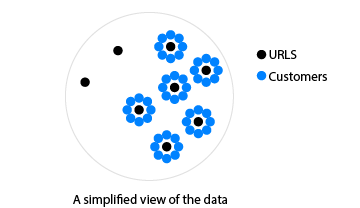

In [176]:
Image('ms-data.png')

In [103]:
!cp anonymous-msweb.data /tmp

In [130]:
%%writefile mostFrequentVisitors.py
#!/usr/bin/env python
#START STUDENT CODE44
import sys, os, re
from mrjob.job import MRJob
from collections import defaultdict

class MRLeftJoin(MRJob):
    def mapper(self, _, line):
        splits = line.rstrip("\n").split(",")
        for line in open("/tmp/anonymous-msweb.data").readlines():
            #A,1287,1,"International AutoRoute","/autoroute"
            parts = line.split(",")
            if(parts[0] == 'A'):
                if(str(parts[1]) == str(splits[1])):
                    webpageurl = parts[4]
                    break
                else:
                    webpageurl = 'no url'
        webpageId = splits[1]
        yield webpageId, (webpageurl, splits[4], 1)
    
    def reducer(self, key, value):
        sumCount = 0
        for webpageurl, visitorId, count in value:
            sumCount += count
        yield webpageId, webpageurl, visitorId, sumCount
        
    def steps(self):
        return [self.mr(
                    mapper=self.mapper,
                    reducer=self.reducer)
                ]
    
if __name__ == '__main__':
    MRLeftJoin.run()

#END STUDENT CODE44

Overwriting mostFrequentVisitors.py


In [131]:
!chmod +x mostFrequentVisitors.py

In [ ]:
!python mostFrequentVisitors.py anonymous-msweb-preprocessed.data > 441_sorted_output.txt

No configs found; falling back on auto-configuration
Creating temp directory /tmp/mostFrequentVisitors.root.20170928.151442.592491
mr() is deprecated and will be removed in v0.6.0. Use mrjob.step.MRStep directly instead.
Running step 1 of 1...
mr() is deprecated and will be removed in v0.6.0. Use mrjob.step.MRStep directly instead.
mr() is deprecated and will be removed in v0.6.0. Use mrjob.step.MRStep directly instead.
mr() is deprecated and will be removed in v0.6.0. Use mrjob.step.MRStep directly instead.
mr() is deprecated and will be removed in v0.6.0. Use mrjob.step.MRStep directly instead.


In [ ]:
!cat 441_sorted_output.txt

## HW4.5 - Clustering Tweet Dataset

For this question use the Tweet data in `topUsers_Apr-Jul_2014_1000-words.txt`, you will implement a 1000-dimensional K-means algorithm in MrJob on the users by their 1000-dimensional word stripes/vectors using several centroid initializations and values of K.

Note that each "point" is a user as represented by 1000 words, and thatword-frequency distributions are generally heavy-tailed power-laws(often called Zipf distributions), and are very rare in the larger class of discrete, random distributions. For each user you will have to normalize by its "TOTAL" column. __Try several parameterizations and initializations__ :

* (A) K=4 uniform random centroid-distributions over the 1000 words (generate 1000 random numbers and normalize the vectors)
* (B) K=2 perturbation-centroids, randomly perturbed from the aggregated (user-wide) distribution 
* (C) K=4 perturbation-centroids, randomly perturbed from the aggregated (user-wide) distribution 
* (D) K=4 "trained" centroids, determined by the sums across the classes. Use use the 
(row-normalized) class-level aggregates as 'trained' starting centroids (i.e., the training is already done for you!).

Note that you do not have to compute the aggregated distribution or the class-aggregated distributions, which are rows in the auxiliary file `topUsers_Apr-Jul_2014_1000-words_summaries.txt`. 

For (A),  we select 4 users randomly from a uniform distribution [1,...,1,000]. For (B), (C), and (D)  you will have to use data from the auxiliary file. In parts (B) and (C), you will have to perturb the 1000-user aggregate (after initially normalizing by its sum, which is also provided). So if in (B) you want to create 2 perturbations of the aggregate, startwith (1), normalize, and generate 1000 random numbers uniformly from the unit interval (0,1) twice (for two centroids), using:

### Notes from office hours

frequency of user using word, normalized--so greatest it can be is one (100%); to do this, divide all wordcounts by total wordcount

a - 4 random centroids
b/c. normal distribution 
d. get mean for each class -- use auxiliary file with sums or words; divide by total and you get a distribution that dist. is  the vector for class 


sorts in mrjob:
1. example in slides. slide 62 and 63
jobconf


In [9]:
from numpy import random
numbers = random.sample(1000)

Take these 1000 numbers and add them (component-wise) to the 1000-user aggregate,
and then renormalize to obtain one of your aggregate-perturbed initial centroids.

In [13]:
###################################################################################
##Geneate random initial centroids around the global aggregate
##Part (B) and (C) of this question
###################################################################################
def startCentroidsBC(k):
    counter = 0
    for line in open("topUsers_Apr-Jul_2014_1000-words_summaries.txt").readlines():
        if counter == 2:        
            data = re.split(",",line)
            globalAggregate = [float(data[i+3])/float(data[2]) for i in range(1000)]
        counter += 1
    #perturb the global aggregate for the four initializations    
    centroids = []
    for i in range(k):
        rndpoints = random.sample(1000)
        peturpoints = [rndpoints[n]/10+globalAggregate[n] for n in range(1000)]
        centroids.append(peturpoints)
        total = 0
        for j in range(len(centroids[i])):
            total += centroids[i][j]
        for j in range(len(centroids[i])):
            centroids[i][j] = centroids[i][j]/total
    return centroids

cent = startCentroidsBC(4)
print len(cent)

4


For experiments A, B, C and D and iterate until a threshold (try 0.001) is reached.
After convergence, print out a summary of the classes present in each cluster.
In particular, report the composition as measured by the total
portion of each class type (0-3) contained in each cluster,
and discuss your findings and any differences in outcomes across parts A-D.

#### copy files to temporary mr job directory

In [54]:
!cp topUsers_Apr-Jul_2014_1000-words_summaries.txt /tmp
!cp topUsers_Apr-Jul_2014_1000-words.txt /tmp
!cp Centroids.txt /tmp

#### Working example that outputs tweet id and cluster assignment

Using Unit test ipynb referenced in slides

In [84]:
%%writefile KMeansCluster.py
#!/usr/bin/env python
#START STUDENT CODE43

from mrjob.job import MRJob
from mrjob.step import MRStep
import re
import numpy as np
from numpy import random
numbers = random.sample(1000)

class KMeans(MRJob):
    
    def startCentroidsBC(self, k):
        counter = 0
        for line in open("/tmp/topUsers_Apr-Jul_2014_1000-words_summaries.txt").readlines():
            if counter == 2:        
                data = re.split(",",line)
                globalAggregate = [float(data[i+3])/float(data[2]) for i in range(1000)]
            counter += 1
        #perturb the global aggregate for the four initializations    
        centroids = []
        for i in range(k):
            rndpoints = random.sample(1000)
            peturpoints = [rndpoints[n]/10+globalAggregate[n] for n in range(1000)]
            centroids.append(peturpoints)
            total = 0
            for j in range(len(centroids[i])):
                total += centroids[i][j]
            for j in range(len(centroids[i])):
                centroids[i][j] = centroids[i][j]/total
        return centroids
    
    def initialize_centroids(self):
        self.centroids = np.random.uniform(low=0.0, high=10.0, size=(self.num_clusters, self.num_features))
        return

    def get_nearest_centroid(self, centroids, X):
        #centroids = np.array(self.centroids)
        self.cluster_assignments = []
        for i in range(len(X)):
            data_point = np.array(X[i])
            # Calculate the distance of this data point from each centroid
            distances = np.sqrt(np.sum(np.square(np.subtract(data_point, centroids)), axis=1))  
            print distances
            # Get the nearest centroid for this data point
            nearest_centroid_index = np.argmin(distances)
            self.cluster_assignments.append(nearest_centroid_index)
        #print len(self.cluster_assignments)
        return 
    
    def calc_new_centroids(self, X):
        sums = np.array([[0.0]*self.num_features]*self.num_clusters)
        counts = np.array([0]*self.num_clusters)
        for i in range(len(X)):
            data_point = np.array(X[i])
            sums[self.cluster_assignments[i]] += data_point
            counts[self.cluster_assignments[i]] += 1
        for i in range(self.num_clusters):
            if counts[i] != 0:
                self.centroids[i] = 1.0*sums[i]/counts[i]
            else:
                pass  # If no data points were assigned to the cluster, keep old centroid
        return
                
    def time_to_stop(self, old_centroids, iteration):
        flag = True
        if iteration >= self.max_iterations:
            flag = True
            print 'Maximum number of iterations reached.'
            return flag
        old_centroids = np.array(old_centroids)
        new_centroids = np.array(self.centroids)
        diffs = np.absolute(np.subtract(old_centroids, new_centroids))
        if np.amax(diffs) < 0.001:
            flag = True
            print 'Stopping threshold reached.  Number of iterations = %d.' %(iteration)
        else:
            flag = False
        return flag
    
    def assign_clusters(self, X, y=None, num_clusters=1):
        self.num_clusters = num_clusters
        self.num_features = len(X[0])
        # Step 0:  Initialize Centroids    
        self.initialize_centroids()
        # Iterate until termination criterion is reached:
        iteration = 1
        while(1):
            # Keep starting centroids to check for convergence
            old_centroids = copy.deepcopy(self.centroids[:])
            # Step 1: Get nearest centroids
            self.get_nearest_centroid(X)
            # Step 2: Calculate New Centroids
            self.calc_new_centroids(X)
            # Check termination criteria
            if iteration%100 == 0:
                print 'Iteration %d complete.' %(iteration)
            if self.time_to_stop(old_centroids, iteration):
                break
            # Increment number of iterations
            iteration += 1
        return
    
    def centroids(self):
        return self.centroids
    
    def cluster_assignments(self):
        return cluster_assignments


    def mapper(self, _, line):
        self.num_clusters = 4
        centroids = np.array(self.startCentroidsBC(self.num_clusters))
        words = line.split(",")
        #first word is id
        #second word is total
        #rest is counts
        points = np.array(words[3:])
        points = [ int(x) for x in points ]
        #get centroid closest to points
        index = self.get_nearest_centroid(centroids, points)
        yield words[0], index

    def reducer(self, userid, cluster):
        yield userid, cluster
        
    def steps(self):
        return [self.mr(
                    mapper = self.mapper,
                    reducer=self.reducer)
                ]

if __name__ == '__main__':
    KMeans.run()


#END STUDENT CODE43

Overwriting KMeansCluster.py


In [85]:
!python KMeansCluster.py topUsers_Apr-Jul_2014_1000-words.txt > 45_output.txt

No configs found; falling back on auto-configuration
Creating temp directory /tmp/KMeansCluster.root.20170928.142842.152695
mr() is deprecated and will be removed in v0.6.0. Use mrjob.step.MRStep directly instead.
Running step 1 of 1...
mr() is deprecated and will be removed in v0.6.0. Use mrjob.step.MRStep directly instead.
mr() is deprecated and will be removed in v0.6.0. Use mrjob.step.MRStep directly instead.
^C
Traceback (most recent call last):
  File "KMeansCluster.py", line 134, in <module>
    KMeans.run()
  File "/opt/anaconda/lib/python2.7/site-packages/mrjob/job.py", line 452, in run
    mr_job.execute()
  File "/opt/anaconda/lib/python2.7/site-packages/mrjob/job.py", line 473, in execute
    super(MRJob, self).execute()
  File "/opt/anaconda/lib/python2.7/site-packages/mrjob/launch.py", line 156, in execute
    self.run_job()
  File "/opt/anaconda/lib/python2.7/site-packages/mrjob/launch.py", line 226, in run_job
    runner.run()
  File "/opt/anaconda/lib/python2.7/site-pa

In [ ]:
!cat 45_output.txt

#### Final attempt

I couldn't quite get this working in time. 

In [50]:
%%writefile Kmeans.py
import numpy as np
from numpy import argmin, array, random
from mrjob.job import MRJob
from mrjob.step import MRStep
from itertools import chain
import os
from collections import defaultdict

def startCentroidsA(k):
    points = random.uniform(size=[k, 1000])
    total = np.sum(points, axis = 1)
    centroids = np.true_divide(points.T, total).T
    return centroids
    
def startCentroidsBC(k):
    counter = 0
    for line in open("/tmp/topUsers_Apr-Jul_2014_1000-words_summaries.txt").readlines():
        if counter == 2:        
            data = re.split(",",line)
            globalAggregate = [float(data[i+3])/float(data[2]) for i in range(1000)]
        counter += 1
    #perturb the global aggregate for the four initializations    
    centroids = []
    for i in range(k):
        rndpoints = random.sample(1000)
        peturpoints = [rndpoints[n]/10+globalAggregate[n] for n in range(1000)]
        centroids.append(peturpoints)
        total = 0
        for j in range(len(centroids[i])):
            total += centroids[i][j]
        for j in range(len(centroids[i])):
            centroids[i][j] = centroids[i][j]/total
    return centroids

def startCentroidsD(k):
    counter = 0
    centroids = []
    for line in open("/tmp/topUsers_Apr-Jul_2014_1000-words_summaries.txt").readlines():
        if counter >= 2:        
            data = re.split(",",line)
            # normalize the class aggregates
            centroids.append([float(data[i+3])/float(data[2]) for i in range(1000)])
        counter += 1
    return centroids

def get_nearest_centroid(data_point, centroid_points):
    centroids = np.array(centroid_points)
    data = np.array(data_point)  
    # Calculate the Euclidean distance between the data_point and each of the centroids
    distances = np.sqrt(np.sum(np.square(np.subtract(data, centroids)), axis=1))  
    # Return the index of the nearest centroid for this data point
    nearest_centroid_index = np.argmin(distances)
    return nearest_centroid_index

def stop_criterion(centroid_points_old, centroid_points_new, T):
    old_centroids = np.array(centroid_points_old)
    new_centroids = np.array(centroid_points_new)
    diffs = np.absolute(np.subtract(old_centroids, new_centroids))
    if np.amax(diffs) < T:
        flag = True
        print 'Stopping threshold reached (%.3f): %.3f' %(T, np.amax(diffs))
    else:
        flag = False
    return flag

def dist(X, centroids):
    centroids = np.array(centroids)
    for i in range(len(X)):
        data_point = np.array(X)
        # Calculate the distance of this data point from each centroid
        distances = np.sqrt(np.sum(np.square(np.subtract(data_point, centroids)), axis=1))              
        # Get the nearest centroid for this data point
        nearest_centroid_index = np.argmin(distances)
    return nearest_centroid_index

#Check whether centroids converge
def stop_criterion(centroid_points_old, centroid_points_new,T):
    oldvalue = list(chain(*centroid_points_old))
    newvalue = list(chain(*centroid_points_new))
    Diff = [abs(x-y) for x, y in zip(oldvalue, newvalue)]
    Flag = True
    for i in Diff:
        if(i>T):
            Flag = False
            break
    return Flag

class MRKmeans(MRJob):
    centroid_points=[]
    k=3    
    def steps(self):
        return [
            MRStep(
                mapper_init = self.mapper_init, 
                mapper=self.mapper,
                combiner = self.combiner,
                reducer=self.reducer)
               ]
    #load centroids info from file
    def mapper_init(self):
        print "Current path:", os.path.dirname(os.path.realpath(__file__))
        
        self.centroid_points = [map(float,s.split('\n')[0].split(',')) for s in open("Centroids.txt").readlines()]
        #open('Centroids.txt', 'w').close()
        
        print "Centroids: ", self.centroid_points
        
    #load data and output the nearest centroid index and data point 
    def mapper(self, _, line):
        words = line.split(",")
        #first word is id
        userId = words[0]
        #second word is code
        code = words[1]
        #third word is total
        total = words[2]
        #rest is counts
        points = np.array(words[3:])
        #normalize counts
        points = [ float(x)/float(total) for x in points ]
        yield int(dist(points,self.centroid_points)), (userId,code,points,1) #instead of d's send words
    #Combine sum of data points locally
    def combiner(self, idx, inputdata): #takes all the word frequency collections and summing them all up
        #start with 1000 arry, and add word counts to each entry of array 
        #should end up with k arrays of word counts
        #output centroid index and (1000 list word frequencies, dictionary)
        codes = defaultdict(float)
        words = defaultdict(float)
        for userId,code,points,n in inputdata:
            for x in range(len(points)):
                codes[code] += float(points[x])
                words[x] += float(points[x])
        yield idx,(words,codes)
    #Aggregate sum for each cluster and then calculate the new centroids
    def reducer(self, idx, inputdata):  #does same thing as combiner
        #end up with dictionary of code counts, final word frequencies, and centroids
        #average of word frequencies for each word--sum of word frequency/total words
        codes = defaultdict(float)
        words = defaultdict(float)
        for points,codeCounts in inputdata:
            for x in range(len(points)):
                words[x] += float(points[x])
            for x in range(len(codeCounts)):
                codes[x] += float(codeCounts[x])
        
        yield idx,(words,codes)
      
if __name__ == '__main__':
    MRKmeans.run()

Overwriting Kmeans.py


In [51]:
%reload_ext autoreload
%autoreload 2
from numpy import random
from Kmeans import MRKmeans, stop_criterion
mr_job = MRKmeans(args=['topUsers_Apr-Jul_2014_1000-words.txt', '--file=Centroids.txt'])

#Initial centroids
centroids = []
k = 3
#uniform
for i in range(k):
    centroids.append([random.uniform(0,1,1000)])
with open('Centroids.txt', 'w+') as f:
    f.writelines(','.join(str(j) for j in i) + '\n' for i in centroids)

#check to see if centroids change
i = 0
while(1):
    oldCentroids = centroids[:]
    print "Iteration "+str(i)+":"
    with mr_job.make_runner() as runner: 
        runner.run()
        #MRJob bit 
        for line in runner.stream_output():
            key,value =  mr_job.parse_output_line(line)
            print key, value
            centroids[key] = value
            
        # Update the centroids
        with open('Centroids.txt', 'w') as f:
            f.writelines(','.join(str(j) for j in i) + '\n' for i in centroids)
        
    print ""
    i = i + 1
    if(stop_criterion(oldCentroids,centroids,0.001)):
        break
print "Centroids"
print "----------"
print centroids

Iteration 0:
Current path: /tmp/Kmeans.root.20170928.140909.699083/job_local_dir/0/mapper/0


ValueError: could not convert string to float: [ 0.88933829  0.66860719  0.19337596  0.64082528  0.43655146  0.99010747

<h2>K-Means</h2>
K-means is a clustering method that aims to find the positions μi,i=1...k of the clusters that minimize the distance from the data points to the cluster. K-means clustering solves:
<br><br>
$$\arg\min_{c} \sum_{i=1}^k\sum_{{x}\in c_i} d({x},\mu_i) = \arg\min_{c} \sum_{i=1}^k\sum_{{x}\in c_i} \left\Vert {x}-\mu_i \right\Vert_2^2$$
<br><br>
where ${c}_i$ is the set of points that belong to cluster i. The K-means clustering uses the square of the Euclidean distance $d({x},\mu_i) = \left\Vert {x}-\mu_i \right\Vert_2^2$. This problem is not trivial (in fact it is NP-hard), so the K-means algorithm only hopes to find the global minimum, possibly getting stuck in a different solution.

<h2>K-means algorithm</h2>

The Lloyd's algorithm, mostly known as k-means algorithm, is used to solve the k-means clustering problem and works as follows. First, decide the number of clusters k. Then:

<table>
<tbody><tr><td>1. Initialize the center of the clusters</td>
<td>${\mu}_i = $ some value $, i=1,...,k$</td>
</tr>
<tr>
<td>2. Attribute the closest cluster to each data point</td>
<td>${c}_i = \{j: d({x}_j, \mu_i) \le d({x}_j, \mu_l),  l \ne i, j=1,...,n\}$ </td>
</tr>
<tr>
<td>3. Set the position of each cluster to the mean of all data points belonging to that cluster</td>
<td>$\mu_i = \frac{1}{|c_i|}\sum_{j\in c_i} {x}_j,\forall i$</td>
</tr>
<tr><td>4. Repeat steps 2-3 until convergence</td>
<td></td>
</tr>
<tr><td>Notation</td><td>${|c|} = $ number of elements in  ${c}$</td>
</tr>
</tbody>
</table>

<h2>Calculating purity</h2>
![purity illustration](http://www.candpgeneration.com/images/purity.png)

In [ ]:
%%writefile Kmeans.py
#!/usr/bin/env python
#START STUDENT CODE45



#END STUDENT CODE45

In [ ]:
%%writefile kmeans_runner.py
#!/usr/bin/env python
#START STUDENT CODE45_RUNNER



#END STUDENT CODE45_RUNNER

## HW4.6  - (OPTIONAL) Scaleable K-MEANS++ 

Over half a century old and showing no signs of aging,
k-means remains one of the most popular data processing
algorithms. As is well-known, a proper initialization
of k-means is crucial for obtaining a good final solution.
The recently proposed k-means++ initialization algorithm
achieves this, obtaining an initial set of centers that is provably
close to the optimum solution. A major downside of the
k-means++ is its inherent sequential nature, which limits its
applicability to massive data: one must make k passes over
the data to find a good initial set of centers. The paper listed below 
shows how to drastically reduce the number of passes needed
to obtain, in parallel, a good initialization. This is unlike
prevailing efforts on parallelizing k-means that have mostly
focused on the post-initialization phases of k-means. The 
proposed initialization algorithm k-means||
obtains a nearly optimal solution after a logarithmic number
of passes; the paper also shows that in practice a constant
number of passes suffices. Experimental evaluation on realworld
large-scale data demonstrates that k-means|| outperforms
k-means++ in both sequential and parallel settings.

Read the following paper entitled "Scaleable K-MEANS++" located at:

http://theory.stanford.edu/~sergei/papers/vldb12-kmpar.pdf 

In MrJob, implement K-MEANS|| and compare with a random initializtion when used in 
conjunction with the kmeans algorithm as an initialization step for the 2D  dataset 
generated using code in the following notebook:

https://www.dropbox.com/s/lbzwmyv0d8rocfq/MrJobKmeans.ipynb?dl=0

Plot the initialation centroids and the centroid trajectory as the K-MEANS|| algorithms iterates. 
Repeat this for a random initalization (i.e., pick a training vector at random for each inital centroid)
of the kmeans algorithm. Comment on the trajectories of both algorithms.
Report on the number passes over the training data, and time required to run both  clustering algorithms.
Also report the rand index score for both algorithms and comment on your findings.

### 4.6.1 (OPTIONAL) Apply K-MEANS||

Apply your implementation of K-MEANS|| to the dataset  in HW 4.5 and compare to the a random initalization (i.e., pick a training vector at random for each inital centroid)of the kmeans algorithm.
Report on the number passes over the training data, and time required to run all  clustering algorithms. 
Also report the rand index score for both algorithms and comment on your findings.

## HW4.7 - (OPTIONAL) Canopy Clustering

An alternative way to intialize the k-means algorithm is the  canopy clustering. The canopy clustering 
algorithm is an unsupervised pre-clustering algorithm introduced by Andrew McCallum, Kamal Nigam and 
Lyle Ungar in 2000. It is often used as preprocessing step for the K-means algorithm or the 
Hierarchical clustering algorithm. It is intended to speed up clustering operations on large data sets, 
where using another algorithm directly may be impractical due to the size of the data set.

For more details on the Canopy Clustering algorithm see:

https://en.wikipedia.org/wiki/Canopy_clustering_algorithm

Plot the initialation centroids and the centroid trajectory as the Canopy Clustering based K-MEANS algorithm iterates. 
Repeat this for a random initalization (i.e., pick a training vector at random for each inital centroid)
of the kmeans algorithm. Comment on the trajectories of both algorithms.
Report on the number passes over the training data, and time required to run both  clustering algorithms.
Also report the rand index score for both algorithms and comment on your findings.

### 4.7.1 (OPTIONAL) Apply Canopy Clustering based K-MEANS

Apply your implementation Canopy Clustering based K-MEANS algorithm to the dataset  in HW 4.5 and compare to the a 
random initalization (i.e., pick a training vector at random for each inital centroid)of the kmeans algorithm.
Report on the number passes over the training data, and time required to run both  clustering algorithms. 
Also report the rand index score for both algorithms and comment on your findings.